### Titanic Dataset - Exploratory Data Analysis (EDA)
##### Author: Danilo Jelovac  
##### Dataset Source: [Kaggle - M Yasser H.](https://www.kaggle.com/datasets/yasserh/titanic-dataset/data)
---

> *“A grand ship, a tragic story — and a dataset that still teaches us about people, chance, and survival.”*

This notebook represents **Part 2: Visualization and Statistical Exploration** of the Titanic project.  
Here, the focus is on identifying patterns in the data, understanding survival-related factors,  
and preparing a clean foundation for the upcoming **machine learning phase**.

---


### Table of Contents

1. [Introduction](#introduction)  
2. [Importing Libraries](#importing-libraries)
3. [Loading data and preview](#loading-data-and-preview)
4. [Basic information](#basic-information)  
5. [Basic information visualized](#basic-information-visualized)    
6. [Data correlation](#data-correlation)
7. [Data correlation visualized](#data-correlation-visualized)
8. [Fare, Class, Survived](#fare-class-survived)
9. [Relations between Non-Numericals and Survived](#relations-between-non-numericals-and-survived)
10. [Relations between Numericals and Survived](#relations-between-numericals-and-survived) 
11. [Saving the data with added SurvivalBinary](#saving-the-data-with-added-survivalbinary) 
12. [Conclusions & Next Steps](#conclusions--next-steps)

---

### Introduction

This notebook explores the **visual and statistical properties** of the cleaned Titanic dataset.  
The goal is to understand how different passenger attributes relate to survival outcomes,  
and to visualize these relationships through distributions, heatmaps, and comparative plots.

The Titanic dataset remains one of the best introductory datasets for practicing  
**data inspection, visualization, and early feature evaluation** before machine learning.


---

##### `Importing Libraries`

In [1]:
# -------
# Imports:
# -------

try:
    import pandas as pd
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    from helper_funct import (
        sex_distribution, class_distribution,
        title_distribution, survived_distribution, 
        familyStat_distribution, oldest_youngest
    )  # --separate script to reduce code.
    
    print("If you see this message, the libraries are uploaded successfuly!")
except ModuleNotFoundError:
    print("Modules not found! Please check if modules are installed.")
    print("Check 'README.md' under 'Requirements' for info.")

If you see this message, the libraries are uploaded successfuly!


##### `Loading data and preview`

In [2]:
# ----------------------------------------
# Loading the dataset, previewing the data:
# ----------------------------------------


# ---------------------------
FOLDER_NAME = 'datasets'
FILE_NAME = 'Titanic-Dataset'
EXTENSION = '.csv'

FILE_PATH = f'../{FOLDER_NAME}/{FILE_NAME}_Cleaned{EXTENSION}'
# ---------------------------

# --Loading and previewing the dataset:
try:
    data = pd.read_csv(FILE_PATH)
    print(f"File '{FILE_NAME}_Cleaned{EXTENSION}' loaded!\n")
except FileNotFoundError:
    print(f"File not found! Please check if path is correct: '{FILE_PATH}'")


print("Previewing data:\n---------------")
display(data.head(5))

File 'Titanic-Dataset_Cleaned.csv' loaded!

Previewing data:
---------------


,PassengerId,Title,Name,Sex,Age,FamilyStatus,Class,Fare,Survived
0,1,Mr,"Braund, Mr. Owen Harris",male,22.0,with_family,3,7.2500,no
1,2,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,with_family,1,71.2833,yes
2,3,Miss,"Heikkinen, Miss. Laina",female,26.0,single,3,7.9250,yes
3,4,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,with_family,1,53.1000,yes
4,5,Mr,"Allen, Mr. William Henry",male,35.0,single,3,8.0500,no


##### `Basic information`

In [3]:
# -----------------
# Basic information:
# -----------------


# -- Total passengers:
print(f"==== TOTAL PASSENGERS: [{len(data['PassengerId'])}] ====\n")

# -- Getting categorical values:
print("==== CATEGORICAL VALUES ====")
print(f"'Title' column: {list(data['Title'].unique())}")
print(f"'Sex' column: {list(data['Sex'].unique())}")
print(f"'FamilyStatus' column: {list(data['FamilyStatus'].unique())}\n")

# -- Distributions:
print("==== DISTRIBUTION BY TITLE ====")
print(title_distribution(data), "\n")
print("==== DISTRIBUTION BY CLASS ====")
print(class_distribution(data), "\n")
print("==== DISTRIBUTION BY SEX ====")
print(sex_distribution(data), "\n")
print("==== DISTRIBUTION BY FAMILY STATUS ====")
print(familyStat_distribution(data), "\n")
print("==== DISTRIBUTION BY SURVIVAL ====")
print(survived_distribution(data), "\n")

# --Youngest vs Oldest
print(oldest_youngest(data))


==== TOTAL PASSENGERS: [889] ====

==== CATEGORICAL VALUES ====
'Title' column: ['Mr', 'Mrs', 'Miss']
'Sex' column: ['male', 'female']
'FamilyStatus' column: ['with_family', 'single']

==== DISTRIBUTION BY TITLE ====
Mr. 578 | Mrs. 127 | Miss: 184 

==== DISTRIBUTION BY CLASS ====
First class: 214 | Second class: 184 | Third class: 491 

==== DISTRIBUTION BY SEX ====
Male passengers: 577 | Female passengers: 312 

==== DISTRIBUTION BY FAMILY STATUS ====
Single passengers: 535 | Families: 354 

==== DISTRIBUTION BY SURVIVAL ====
Survived: 340 | Killed: 549 


>>. Oldest person: Barkworth, Mr. Algernon Henry Wilson, [80] - Survived: yes
>>. Youngest person: Thomas, Master. Assad Alexander, [0] - Survived: yes
    


##### `Basic information visualized`

==== VISUALIZATIONS ====


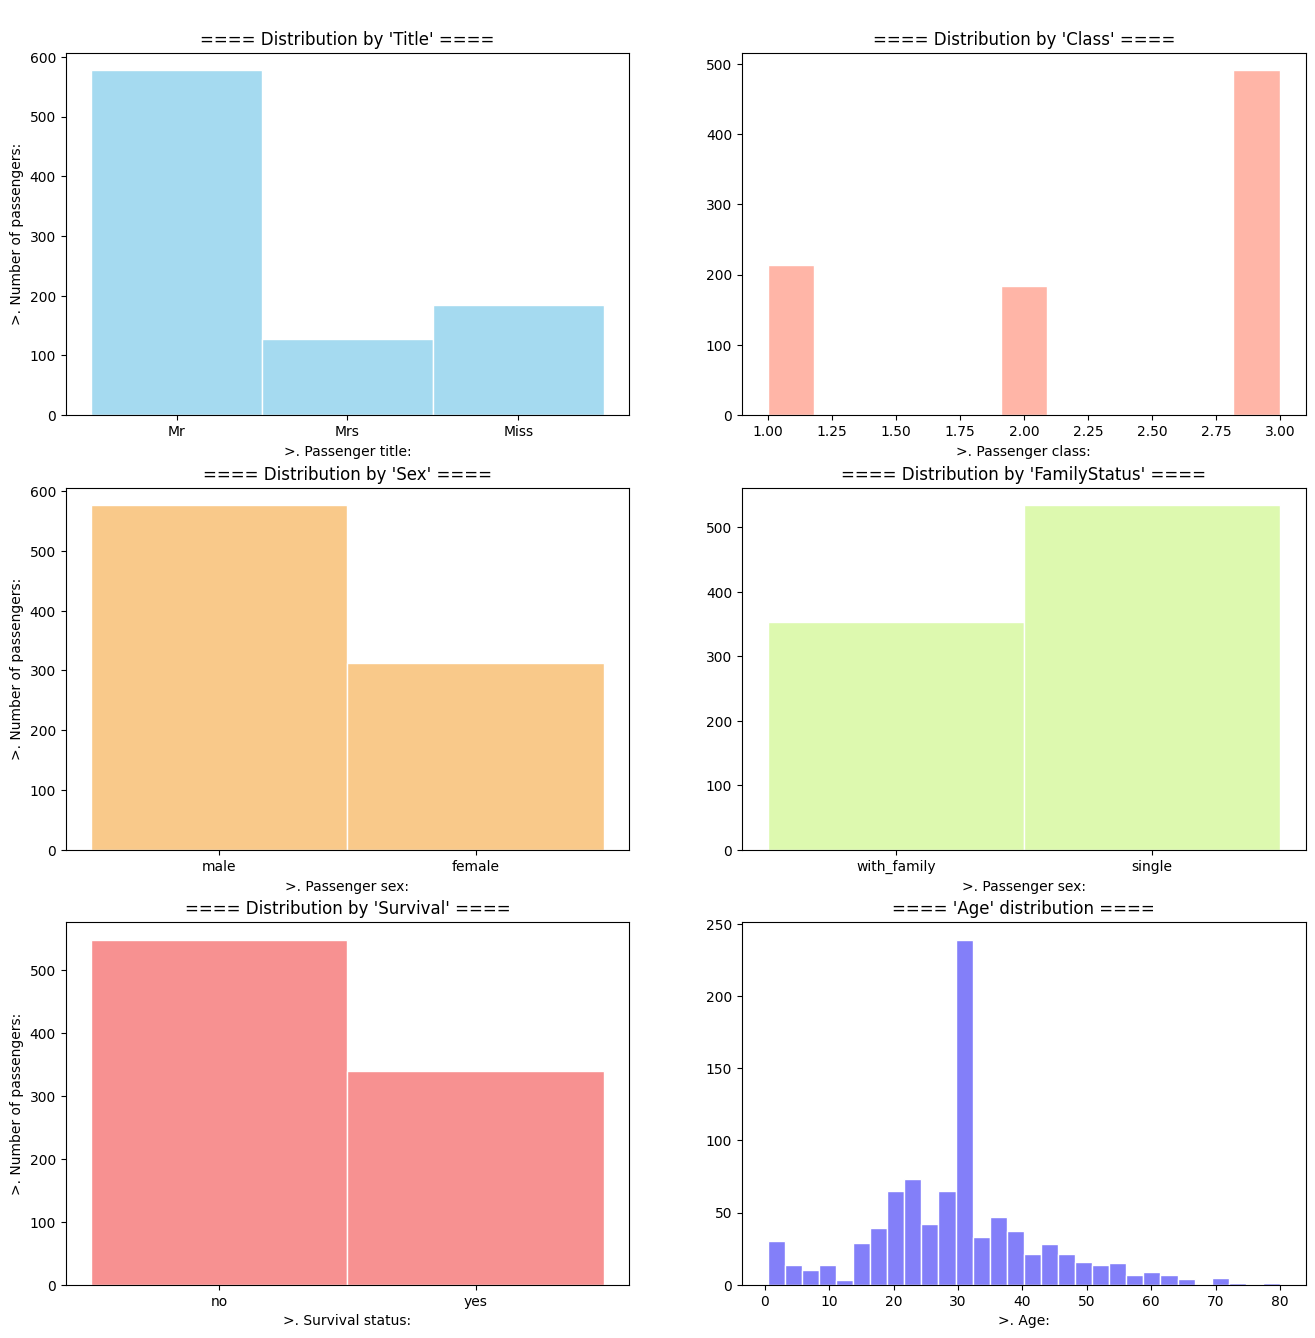

In [4]:
# ------------------------
# Distributions visualized:
# ------------------------

print("==== VISUALIZATIONS ====")

fig, axes = plt.subplots(3, 2, figsize=(16,16))
sns.set_style("whitegrid")
axes = axes.flatten()

# -- Distribution by title:
# plt.figure(figsize=(6,3))
sns.histplot(data=data['Title'], color='skyblue', ax=axes[0])
axes[0].set_title("\n==== Distribution by 'Title' ====")
axes[0].set_xlabel(">. Passenger title:")
axes[0].set_ylabel(">. Number of passengers:")

# -- Distribution by class:
# plt.figure(figsize=(6,3))
sns.histplot(data=data['Class'], color='#FF9D8A', kde=False, ax=axes[1])
axes[1].set_title("\n==== Distribution by 'Class' ====")
axes[1].set_xlabel(">. Passenger class:")
axes[1].set_ylabel(" ")

# -- Distribution by sex:
# plt.figure(figsize=(6,3))
sns.histplot(data=data['Sex'], color='#F7B763', ax=axes[2])
axes[2].set_title("\n==== Distribution by 'Sex' ====")
axes[2].set_xlabel(">. Passenger sex:")
axes[2].set_ylabel(">. Number of passengers:")

# -- Distribution by family status:
# plt.figure(figsize=(6,3))
sns.histplot(data=data['FamilyStatus'], color='#D2F794', ax=axes[3])
axes[3].set_title("\n==== Distribution by 'FamilyStatus' ====")
axes[3].set_xlabel(">. Passenger sex:")
axes[3].set_ylabel(" ")

# -- Distribution by survived:
# plt.figure(figsize=(6,3))
sns.histplot(data=data['Survived'], color='#F56C6C', ax=axes[4])
axes[4].set_title("\n==== Distribution by 'Survival' ====")
axes[4].set_xlabel(">. Survival status:")
axes[4].set_ylabel(">. Number of passengers:")

# -- Age distribution:
# plt.figure(figsize=(6,3))
sns.histplot(data['Age'], color='#5A54F7', ax=axes[5], kde=False)
axes[5].set_title("\n==== 'Age' distribution ====")
axes[5].set_xlabel(">. Age:")
axes[5].set_ylabel(" ")

# -- Show:
# plt.tight_layout()
plt.show()


##### `Data correlation`

In [5]:
# ------------------------
# Correlation between data:
# ------------------------


# -- Extracting numerical values, adding binary y/n 'Survived' column:
data['SurvivedBinary'] = data['Survived'].map({'yes': 1, 'no': 0})
numeric_data = data[['Age', 'Class', 'Fare', 'SurvivedBinary']]

# -- Data description:
print("==== DESCRIPTION OF THE NUMERICAL DATA ====")
display(numeric_data.describe())

# -- Data correlation:
print("==== DATA CORRELATION ====")
display("1. Pearson:", numeric_data.corr(method='pearson'))
display("2. Kendall:", numeric_data.corr(method='kendall'))
display("3. Spearman:", numeric_data.corr(method='spearman'))


==== DESCRIPTION OF THE NUMERICAL DATA ====


,Age,Class,Fare,SurvivedBinary
count,889.000000,889.000000,889.000000,889.000000
mean,29.653446,2.311586,32.096681,0.382452
std,12.968366,0.834700,49.697504,0.486260
min,0.420000,1.000000,0.000000,0.000000
25%,22.000000,2.000000,7.895800,0.000000
50%,29.699118,3.000000,14.454200,0.000000
75%,35.000000,3.000000,31.000000,1.000000
max,80.000000,3.000000,512.329200,1.000000


==== DATA CORRELATION ====


'1. Pearson:'

,Age,Class,Fare,SurvivedBinary
Age,1.000000,-0.327954,0.088604,-0.074673
Class,-0.327954,1.000000,-0.548193,-0.335549
Fare,0.088604,-0.548193,1.000000,0.255290
SurvivedBinary,-0.074673,-0.335549,0.255290,1.000000


'2. Kendall:'

,Age,Class,Fare,SurvivedBinary
Age,1.000000,-0.242931,0.078006,-0.036058
Class,-0.242931,1.000000,-0.572024,-0.320934
Fare,0.078006,-0.572024,1.000000,0.263799
SurvivedBinary,-0.036058,-0.320934,0.263799,1.000000


'3. Spearman:'

,Age,Class,Fare,SurvivedBinary
Age,1.000000,-0.305614,0.114772,-0.043135
Class,-0.305614,1.000000,-0.686166,-0.336917
Fare,0.114772,-0.686166,1.000000,0.320772
SurvivedBinary,-0.043135,-0.336917,0.320772,1.000000


##### `Data correlation visualized`

==== DATA CORRELATION VISUALIZED ====
>. Pearson:


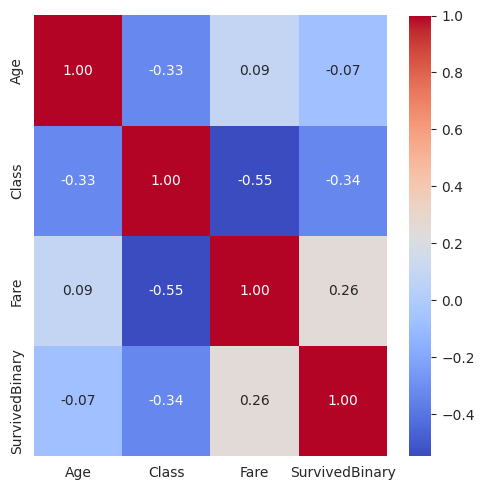

>. Kendall:


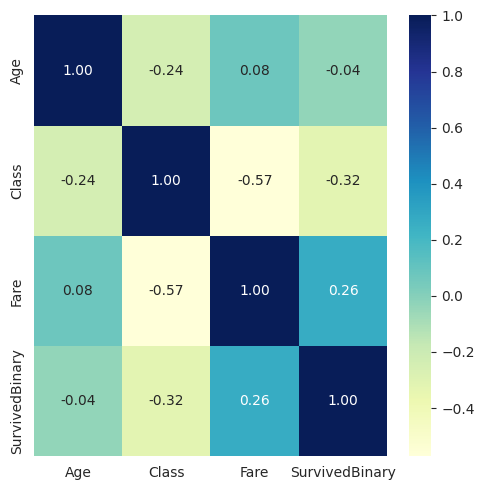

>. Spearman:


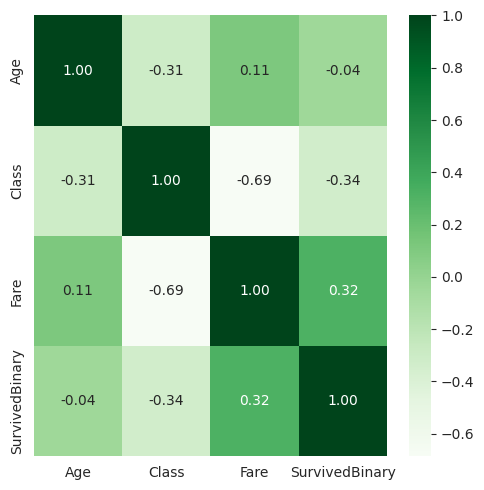

In [6]:
# ----------------------
# Correlation visualized:
# ----------------------


# -- Data correlation looped for each type of corr:
print("==== DATA CORRELATION VISUALIZED ====")

corr_method = ['pearson', 'kendall', 'spearman']
cmap_list = ['coolwarm', 'YlGnBu', 'Greens']

for cmethod_, cmap_ in zip(corr_method, cmap_list):
    
    print(">.", cmethod_.capitalize() + ":")
    
    plt.figure(figsize=(5,5))
    sns.set_style("whitegrid")

    sns.heatmap(numeric_data.corr(method=cmethod_), 
                cmap=cmap_, annot=True, fmt='.2f')
    plt.tight_layout()
    plt.show()


##### `Fare, Class, Survived:`

==== FARE, CLASS, SURVIVED RELATIONS ====


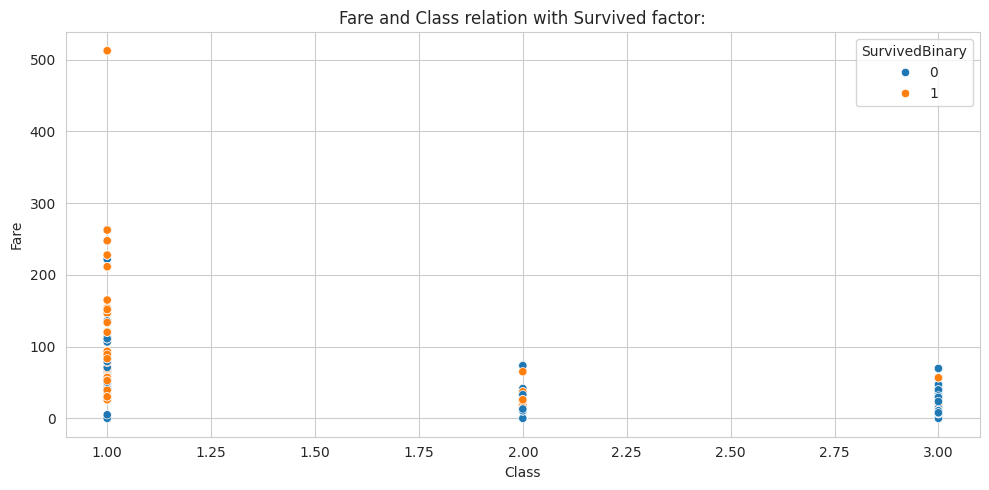

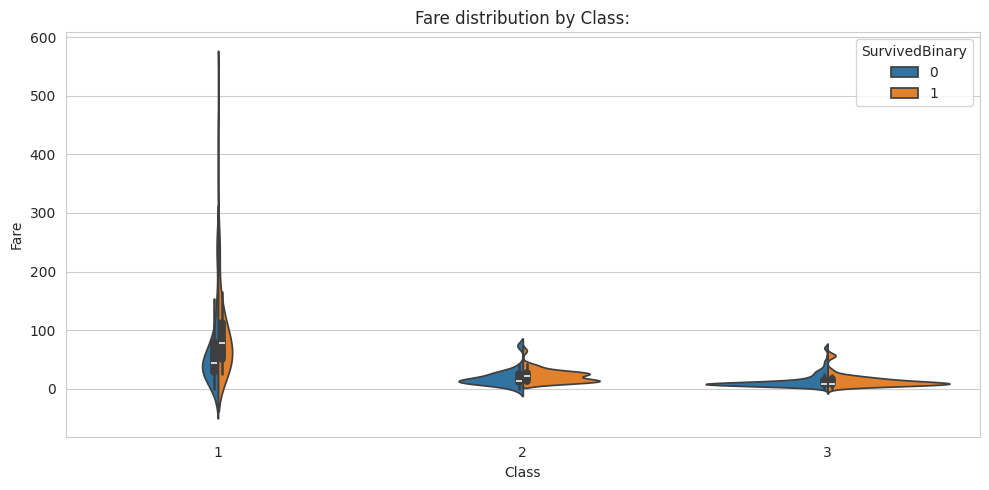

In [7]:
# ---------------------
# Fare, Class, Survived:
# ---------------------

print("==== FARE, CLASS, SURVIVED RELATIONS ====")

# -- Fare and Class I:
fig = plt.subplots(figsize=(10, 5))
sns.set_style("whitegrid")

sns.scatterplot(data=data, x='Class', y='Fare', hue='SurvivedBinary')
plt.title("Fare and Class relation with Survived factor:")
plt.tight_layout()

# -- Fare and Class II:
fig = plt.subplots(figsize=(10, 5))
sns.set_style("whitegrid")

sns.violinplot(x='Class', y='Fare', data=data, hue='SurvivedBinary', split=True)
plt.title('Fare distribution by Class:')

plt.tight_layout()
plt.show()


##### `Relations between Non-Numericals and Survived`

==== [%] SURVIVED v NON NUMERICAL CATEGORIES ====


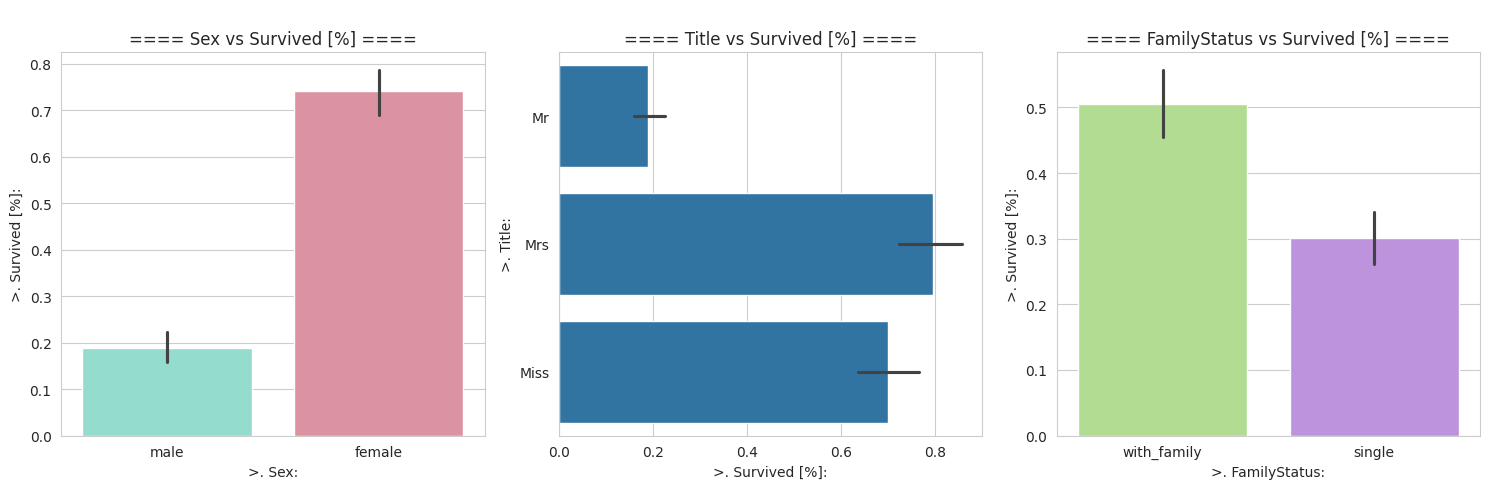

In [8]:
# ----------------------------
# Relations between categories
# (non numerical) and Survived:
# ----------------------------


print("==== [%] SURVIVED v NON NUMERICAL CATEGORIES ====")

# -- Sex, Title, FamilyStatus v. Survived (Binary):
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.set_style("whitegrid")
axes = axes.flatten()

sns.barplot(data=data, x='Sex', y='SurvivedBinary', ax=axes[0],
            hue='Sex', palette=['#87E8D6', '#E88799'])
axes[0].set_title("\n==== Sex vs Survived [%] ====")
axes[0].set_xlabel(">. Sex:")
axes[0].set_ylabel(">. Survived [%]:")

sns.barplot(data=data, x='SurvivedBinary', y='Title', ax=axes[1])
axes[1].set_title("\n==== Title vs Survived [%] ====")
axes[1].set_xlabel(">. Survived [%]:")
axes[1].set_ylabel(">. Title:")

sns.barplot(data=data, x='FamilyStatus', y='SurvivedBinary', ax=axes[2],
            hue= 'FamilyStatus', palette=['#B1E887', '#BE87E8'])
axes[2].set_title("\n==== FamilyStatus vs Survived [%] ====")
axes[2].set_xlabel(">. FamilyStatus:")
axes[2].set_ylabel(">. Survived [%]:")


plt.tight_layout()
plt.show()

##### `Relations between Numericals and Survived`

==== SURVIVED v NUMERICAL CATEGORIES ====


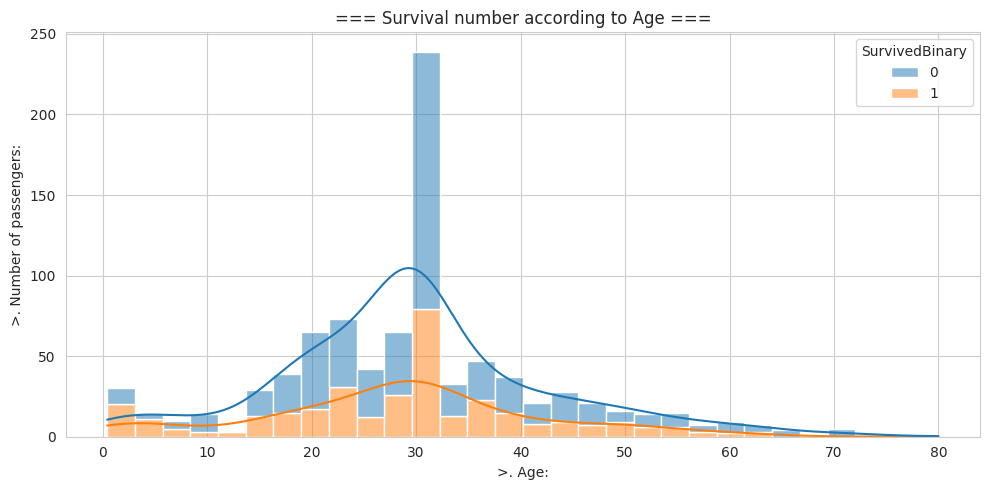

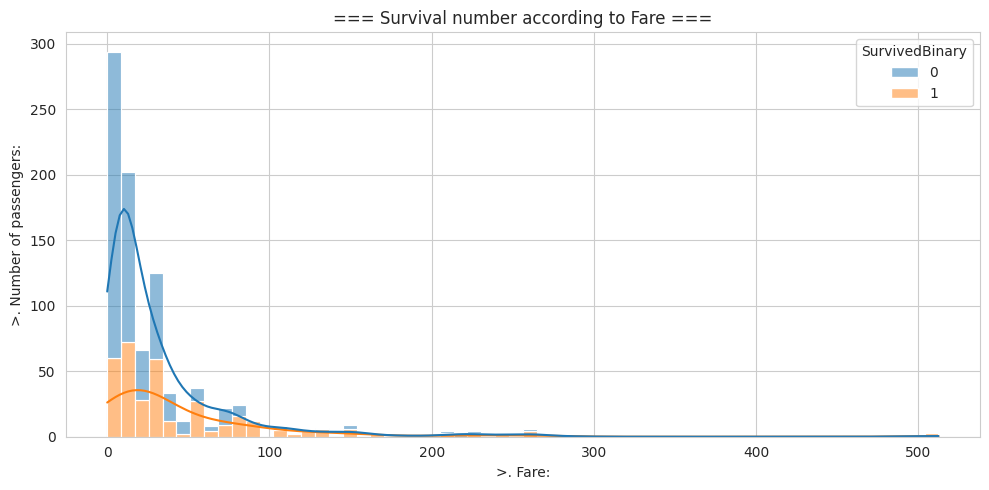

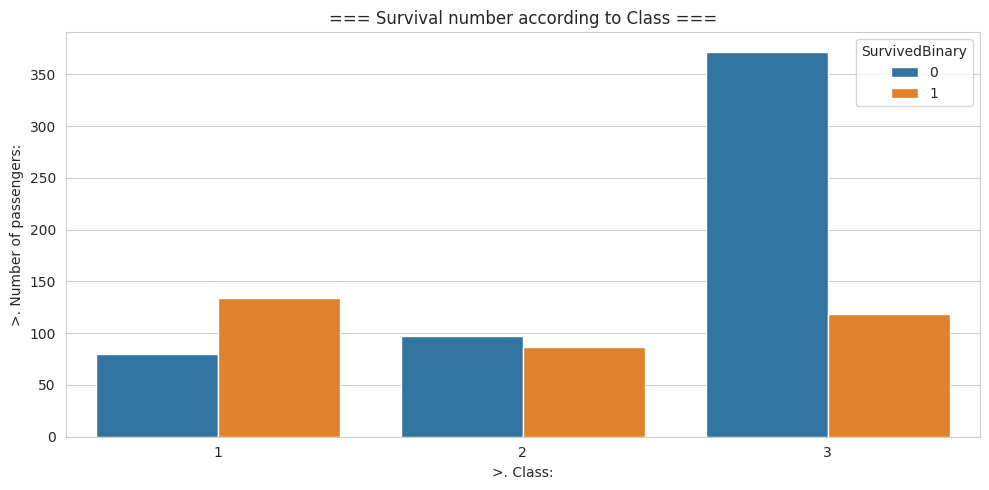

In [9]:
# -----------------------------------------
# Relations between numericals and Survived:
# -----------------------------------------


print("==== SURVIVED v NUMERICAL CATEGORIES ====")

# -- Age v. Survived (Binary):
plt1 = plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

sns.histplot(data=data, x='Age', hue='SurvivedBinary', kde=True, multiple='stack')
plt.title('=== Survival number according to Age ===')
plt.xlabel('>. Age:')
plt.ylabel('>. Number of passengers:')
plt.tight_layout()
plt.show()

# -- Fare v. Survived (Binary):
fig2 = plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

sns.histplot(data=data, x='Fare', hue='SurvivedBinary', kde=True, multiple='stack')
plt.title('=== Survival number according to Fare ===')
plt.xlabel('>. Fare:')
plt.ylabel('>. Number of passengers:')
plt.tight_layout()
plt.show()

# -- Class v. Survived (Binary):
fig2 = plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

sns.countplot(x='Class', hue='SurvivedBinary', data=data)
plt.title('=== Survival number according to Class ===')
plt.xlabel('>. Class:')
plt.ylabel('>. Number of passengers:')
plt.tight_layout()
plt.show()



##### `Saving the data with added SurvivalBinary`

In [10]:
# --------------------
# Saving the dataframe:
# --------------------


# ---------------------------
NEW_FILE_NAME = 'Titanic-Dataset_Cleaned_MLRdy'
# EXTENSION = '.csv'

SAVE_FILE_PATH = f'../{FOLDER_NAME}/{NEW_FILE_NAME}{EXTENSION}'
# ---------------------------

try:
    data.to_csv(SAVE_FILE_PATH, index=False)
    print(f"File '{NEW_FILE_NAME}' saved! Path: '{SAVE_FILE_PATH}'.")
except Exception as e:
    print(f"Someting went wrong... Error: {e}")

File 'Titanic-Dataset_Cleaned_MLRdy' saved! Path: '../datasets/Titanic-Dataset_Cleaned_MLRdy.csv'.


##### `Concslusion:`

- Survival is strongly influenced by **Sex**, **Class**, and **Fare**.  
- **Age** shows only a weak relationship to survival; most passengers were between **20–35** years old.  
- Passengers traveling with family had a slightly higher chance of survival.  
- Visualizations confirm historically consistent patterns such as *“women and children first”*.  
- These insights provide a clear direction for selecting features during model training.

This notebook completes the exploratory analysis and prepares the dataset for the machine learning workflow.


---

##### `Next Steps`

- Proceed to **Part 3: Model Training, Validation, and Evaluation**.  
- Validate the insights discovered during EDA through predictive modeling.  
- Assess how well the model can classify survival outcomes.

---


##### `About the Author`

**Danilo Jelovac** — Aspiring Data Analyst & Python Developer  
Focused on clean, understandable code and data-driven storytelling. 
 
> Portfolio: *[[GitHub link](https://github.com/d-jlvc/data-ml-portfolio)]*  
> LinkedIn: *[[LinkedIn link](https://www.linkedin.com/in/danilo-jelovac-b1b7a5396/)]*  